# Uma regressão linear simples

Vamos fazer uns dados *fake*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 200
sigma = 0.5

In [3]:
x = -3.0 + 10*np.random.random((200, 1))

In [4]:
y = 4 + 3*x + sigma*np.random.normal(size=x.shape)

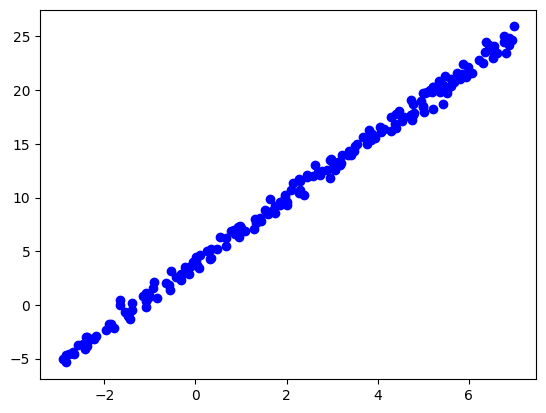

In [5]:
plt.plot(x, y, 'bo')

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
x_plot = np.linspace(-3, 7, 100)
y_plot = model.predict(x_plot.reshape(-1, 1))

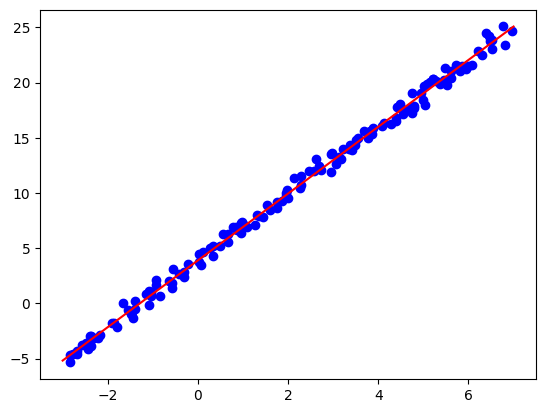

In [12]:
plt.figure()
plt.plot(X_train, y_train, 'bo')
plt.plot(x_plot, y_plot, 'r-')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'O RMSE deu {RMSE:.3f}')

O RMSE deu 0.590


# Quando a regressão linear não funciona

In [14]:
y = 0.5*x**2 + -1.0*x - 1.0 + sigma*np.random.normal(size=x.shape)

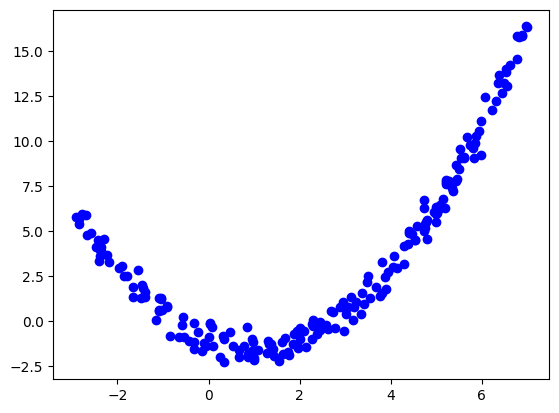

In [15]:
plt.plot(x, y, 'bo')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
x_plot = np.linspace(-3, 7, 100)
y_plot = model.predict(x_plot.reshape(-1, 1))

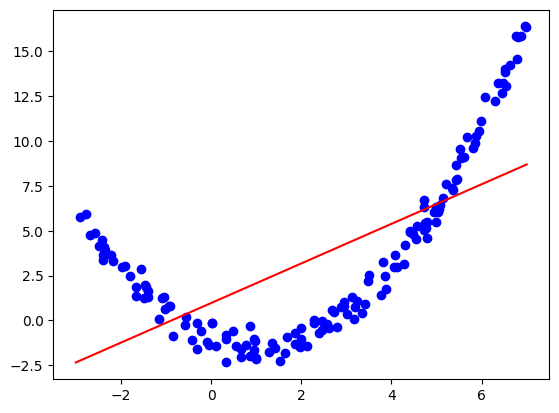

In [20]:
plt.figure()
plt.plot(X_train, y_train, 'bo')
plt.plot(x_plot, y_plot, 'r-')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'O RMSE deu {RMSE:.3f}')

O RMSE deu 3.677


# Feature engineering

In [22]:
x.shape

(200, 1)

In [23]:
x_feat = np.zeros((len(x), 2))

In [24]:
x_feat.shape

(200, 2)

In [25]:
x_feat[:, 0] = x[:,0]

In [26]:
x_feat[:, 1] = (x[:,0])**2

In [27]:
x_feat[:5, :]

array([[ 2.0929492 ,  4.38043634],
       [ 5.48939987, 30.13351091],
       [ 4.72746475, 22.348923  ],
       [-2.35111357,  5.527735  ],
       [ 4.07323873, 16.59127376]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_feat, y, test_size=0.25)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
x_plot = np.linspace(-3, 7, 100)
x_feat_plot = np.zeros((len(x_plot), 2))
x_feat_plot[:, 0] = x_plot
x_feat_plot[:, 1] = (x_plot)**2
y_plot = model.predict(x_feat_plot)

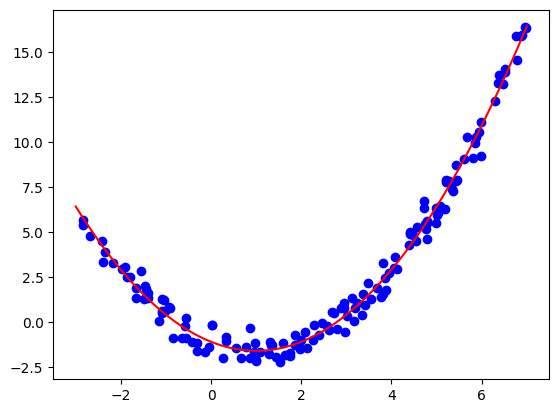

In [39]:
plt.figure()
plt.plot(X_train[:, 0], y_train, 'bo')
plt.plot(x_plot, y_plot, 'r-')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'O RMSE deu {RMSE:.3f}')

O RMSE deu 0.509


# Criando features polinomiais com Scikit-Learn

## Usando transformadores

### StandardScaler

In [51]:
n = 200
sigma = 0.5

In [52]:
x = -3.0 + 10*np.random.random((200, 1))

In [53]:
np.mean(x)

2.008725657943204

In [54]:
np.std(x)

2.898541308282244

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
transform = StandardScaler()

In [57]:
transform.fit(x)

StandardScaler()

In [59]:
transform.mean_

array([2.00872566])

In [61]:
np.sqrt(transform.var_)

array([2.89854131])

In [62]:
x_transformado = transform.transform(x)

In [63]:
np.mean(x_transformado)

-1.9984014443252817e-17

In [64]:
np.std(x_transformado)

1.0

### PolynomialFeatures

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
transform = PolynomialFeatures(degree=2, include_bias=False)

In [76]:
transform.fit(x)

PolynomialFeatures(include_bias=False)

In [77]:
x_transformado = transform.transform(x)

In [78]:
x_transformado[:5, :]

array([[ 5.15663492, 26.59088366],
       [ 0.74559993,  0.55591926],
       [-2.53497299,  6.42608805],
       [-2.39470586,  5.73461613],
       [-1.47863645,  2.18636576]])